In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [165]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male 22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   
2                               Heikkinen, Miss. Laina  female 26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                             Allen, Mr. William Henry    male 35.00      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male 27.00      0   
887                       Graham, Miss. Margaret Edith  female 19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male 26.00      0   
890                                Dooley, Mr. Patrick    male 32.00      0   

     Parch            Ticket  Fare Cabin Embarked  
0        0         A/5 21171  7.25   NaN        S  
1        0          PC 17599 71.28   C85        C  
2        0  STON/O2. 3101282  7.92   NaN        S  
3        0            113803 53.10  C123        S  
4        0            373450  8.05   NaN        S  
..     ...               ...   ...   ...      ...  
886      0            211536 13.00   NaN        S  
887      0            112053 30.00   B42        S  
888      2        W./C. 6607 23.45   NaN        S  
889      0            111369 30.00  C148        C  
890      0            370376  7.75   NaN        Q  

[891 rows x 12 columns]

In [166]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

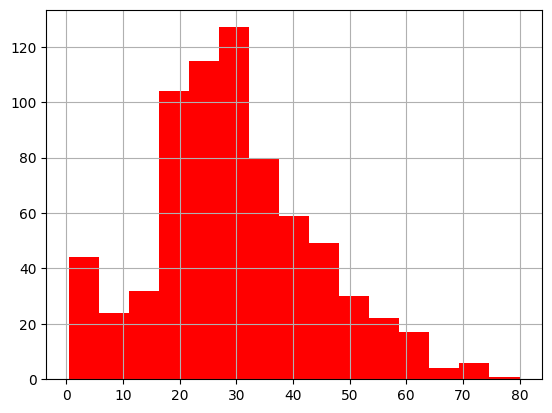

In [167]:
train_df['Age'].hist(bins=15, color='red')

In [168]:
train_df['Age'].median(skipna=True)

28.0

<Axes: xlabel='Embarked', ylabel='count'>

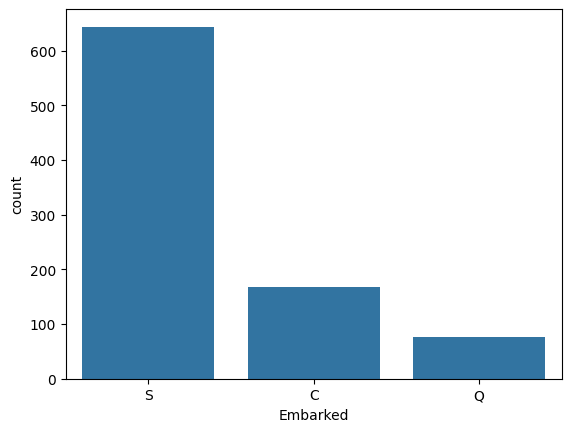

In [169]:
sns.countplot(x='Embarked', data = train_df)

In [170]:
train_data = train_df.copy()

In [171]:
train_data.head(2)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male 22.00      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  
1      0   PC 17599 71.28   C85        C

In [172]:
train_data['Age'] = train_data['Age'].fillna(train_df['Age'].median(skipna=True))

train_data['Embarked'] = train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax())

train_data.drop('Cabin', axis=1, inplace=True)
#train_data = train_data.drop('Cabin', axis=1)

In [173]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [174]:
train_data['travel_alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [175]:
train_data = train_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1)

In [176]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [177]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Embarked', 'Sex', 'travel_alone'])

In [178]:
train_data = train_data.drop(['Sex_male', 'travel_alone_0'], axis=1)



In [179]:
train_data

Survived   Age  Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0           0 22.00  7.25     False     False      True       False   
1           1 38.00 71.28      True     False     False        True   
2           1 26.00  7.92     False     False      True       False   
3           1 35.00 53.10      True     False     False       False   
4           0 35.00  8.05     False     False      True       False   
..        ...   ...   ...       ...       ...       ...         ...   
886         0 27.00 13.00     False      True     False       False   
887         1 19.00 30.00      True     False     False       False   
888         0 28.00 23.45     False     False      True       False   
889         1 26.00 30.00      True     False     False        True   
890         0 32.00  7.75     False     False      True       False   

     Embarked_Q  Embarked_S  Sex_female  travel_alone_1  
0         False        True       False           False  
1         False       False        True           False  
2         False        True        True            True  
3         False        True        True           False  
4         False        True       False            True  
..          ...         ...         ...             ...  
886       False        True       False            True  
887       False        True        True            True  
888       False        True        True           False  
889       False       False       False            True  
890        True       False       False            True  

[891 rows x 11 columns]

In [180]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [181]:
test_data = test_df.copy()

In [182]:
test_data['Age'] = test_data['Age'].fillna(train_df['Age'].median(skipna=True))

test_data['Fare'] = test_data['Fare'].fillna(train_df['Fare'].median(skipna=True))

test_data.drop('Cabin', axis=1, inplace=True)

test_data['travel_alone'] = np.where((test_data['SibSp'] + test_data['Parch']) > 0, 0, 1)

test_data = test_data.drop(['SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1)

test_data = pd.get_dummies(test_data, columns=['Pclass', 'Embarked', 'Sex', 'travel_alone'])

test_data = test_data.drop(['Sex_male', 'travel_alone_0'], axis=1)

test_data

Age   Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0   34.50   7.83     False     False      True       False        True   
1   47.00   7.00     False     False      True       False       False   
2   62.00   9.69     False      True     False       False        True   
3   27.00   8.66     False     False      True       False       False   
4   22.00  12.29     False     False      True       False       False   
..    ...    ...       ...       ...       ...         ...         ...   
413 28.00   8.05     False     False      True       False       False   
414 39.00 108.90      True     False     False        True       False   
415 38.50   7.25     False     False      True       False       False   
416 28.00   8.05     False     False      True       False       False   
417 28.00  22.36     False     False      True        True       False   

     Embarked_S  Sex_female  travel_alone_1  
0         False       False            True  
1          True        True           False  
2         False       False            True  
3          True       False            True  
4          True        True           False  
..          ...         ...             ...  
413        True       False            True  
414       False        True            True  
415        True       False            True  
416        True       False            True  
417       False       False           False  

[418 rows x 10 columns]

In [183]:
final_train = train_data.copy()
final_test = test_data.copy()

In [184]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'travel_alone_1'],
      dtype='object')

In [185]:
final_test.columns

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'travel_alone_1'],
      dtype='object')

In [186]:
feature_cols = final_test.columns

In [187]:
X = final_train[feature_cols]
y = final_train['Survived']

model = LogisticRegression()
logr = model.fit(X, y)



In [188]:
y_pred = logr.predict(X)
accuracy_score(y_pred, y)


0.7934904601571269

In [189]:
final_test.head()

Age  Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0 34.50  7.83     False     False      True       False        True   
1 47.00  7.00     False     False      True       False       False   
2 62.00  9.69     False      True     False       False        True   
3 27.00  8.66     False     False      True       False       False   
4 22.00 12.29     False     False      True       False       False   

   Embarked_S  Sex_female  travel_alone_1  
0       False       False            True  
1        True        True           False  
2       False       False            True  
3        True       False            True  
4        True        True           False

In [190]:
final_test['Survived'] = logr.predict(final_test[feature_cols])


In [191]:
1 - final_train['Survived'].sum()/891

0.6161616161616161

In [192]:
final_test

Age   Fare  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0   34.50   7.83     False     False      True       False        True   
1   47.00   7.00     False     False      True       False       False   
2   62.00   9.69     False      True     False       False        True   
3   27.00   8.66     False     False      True       False       False   
4   22.00  12.29     False     False      True       False       False   
..    ...    ...       ...       ...       ...         ...         ...   
413 28.00   8.05     False     False      True       False       False   
414 39.00 108.90      True     False     False        True       False   
415 38.50   7.25     False     False      True       False       False   
416 28.00   8.05     False     False      True       False       False   
417 28.00  22.36     False     False      True        True       False   

     Embarked_S  Sex_female  travel_alone_1  Survived  
0         False       False            True         0  
1          True        True           False         0  
2         False       False            True         0  
3          True       False            True         0  
4          True        True           False         1  
..          ...         ...             ...       ...  
413        True       False            True         0  
414       False        True            True         1  
415        True       False            True         0  
416        True       False            True         0  
417       False       False           False         0  

[418 rows x 11 columns]

In [193]:
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept


(array([[-3.19560807e-02,  7.37859187e-04,  9.99266040e-01,
          1.21371961e-01, -1.16063980e+00,  1.73655740e-01,
          1.41323707e-01, -3.54981244e-01,  2.48801040e+00,
          4.79889628e-02]]),
 array([-0.05241431]))

## Log reg with train_test_split

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [196]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, conf_matrix, precision, recall, f1

(0.7947761194029851,
 array([[140,  28],
        [ 27,  73]], dtype=int64),
 0.7227722772277227,
 0.73,
 0.7263681592039801)

## Change threshold

In [197]:
threshold = 0.8
y_pred_proba = model2.predict_proba(X_test)[:, 1]
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

In [198]:
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
precision_threshold = precision_score(y_test, y_pred_threshold)
recall_threshold = recall_score(y_test, y_pred_threshold)
f1_threshold = f1_score(y_test, y_pred_threshold)

accuracy_threshold, conf_matrix_threshold, precision_threshold, recall_threshold, f1_threshold

(0.7686567164179104,
 array([[167,   1],
        [ 61,  39]], dtype=int64),
 0.975,
 0.39,
 0.5571428571428572)

## ROC-AUC

In [199]:

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

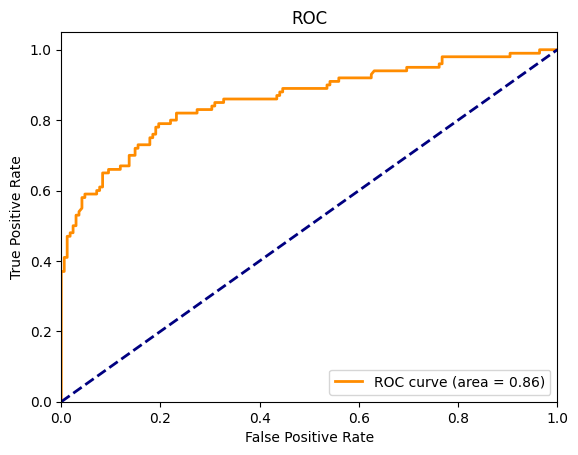

In [200]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## GridSearchCV + Stratified K-Fold

In [201]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet']}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=skf, scoring='precision')
grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best result:", grid_search.best_score_)

Best params: {'C': 0.01, 'penalty': 'l2'}
Best result: 0.7933993729060143


In [202]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, conf_matrix, precision, recall, f1

(0.753731343283582,
 array([[157,  11],
        [ 55,  45]], dtype=int64),
 0.8035714285714286,
 0.45,
 0.5769230769230769)

## SVM

In [203]:
from sklearn.svm import SVC

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

In [205]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


accuracy, conf_matrix, precision, recall, f1

(0.7164179104477612,
 array([[160,   8],
        [ 68,  32]], dtype=int64),
 0.8,
 0.32,
 0.45714285714285713)

In [206]:
svm = SVC(max_iter = 1000000)

from sklearn.model_selection import GridSearchCV

param_grid = {
              'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
              'gamma': [1, 10, 100, 1000]}


grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=SVC(max_iter=1000000), n_jobs=-1,
             param_grid={'gamma': [1, 10, 100, 1000],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [207]:
print("Best params:", grid_search.best_params_)

Best params: {'gamma': 1, 'kernel': 'linear'}


In [208]:
y_pred_svm = grid_search.predict(X_test)

In [209]:
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

accuracy, conf_matrix, precision, recall, f1

(0.7873134328358209,
 array([[140,  28],
        [ 29,  71]], dtype=int64),
 0.7171717171717171,
 0.71,
 0.7135678391959799)

## Decision trees

In [210]:
from sklearn import tree

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf_tree = tree.DecisionTreeClassifier(criterion='entropy')
clf_tree.fit(X_train, y_train)

#y_pred = model2.predict(X_test)

DecisionTreeClassifier(criterion='entropy')

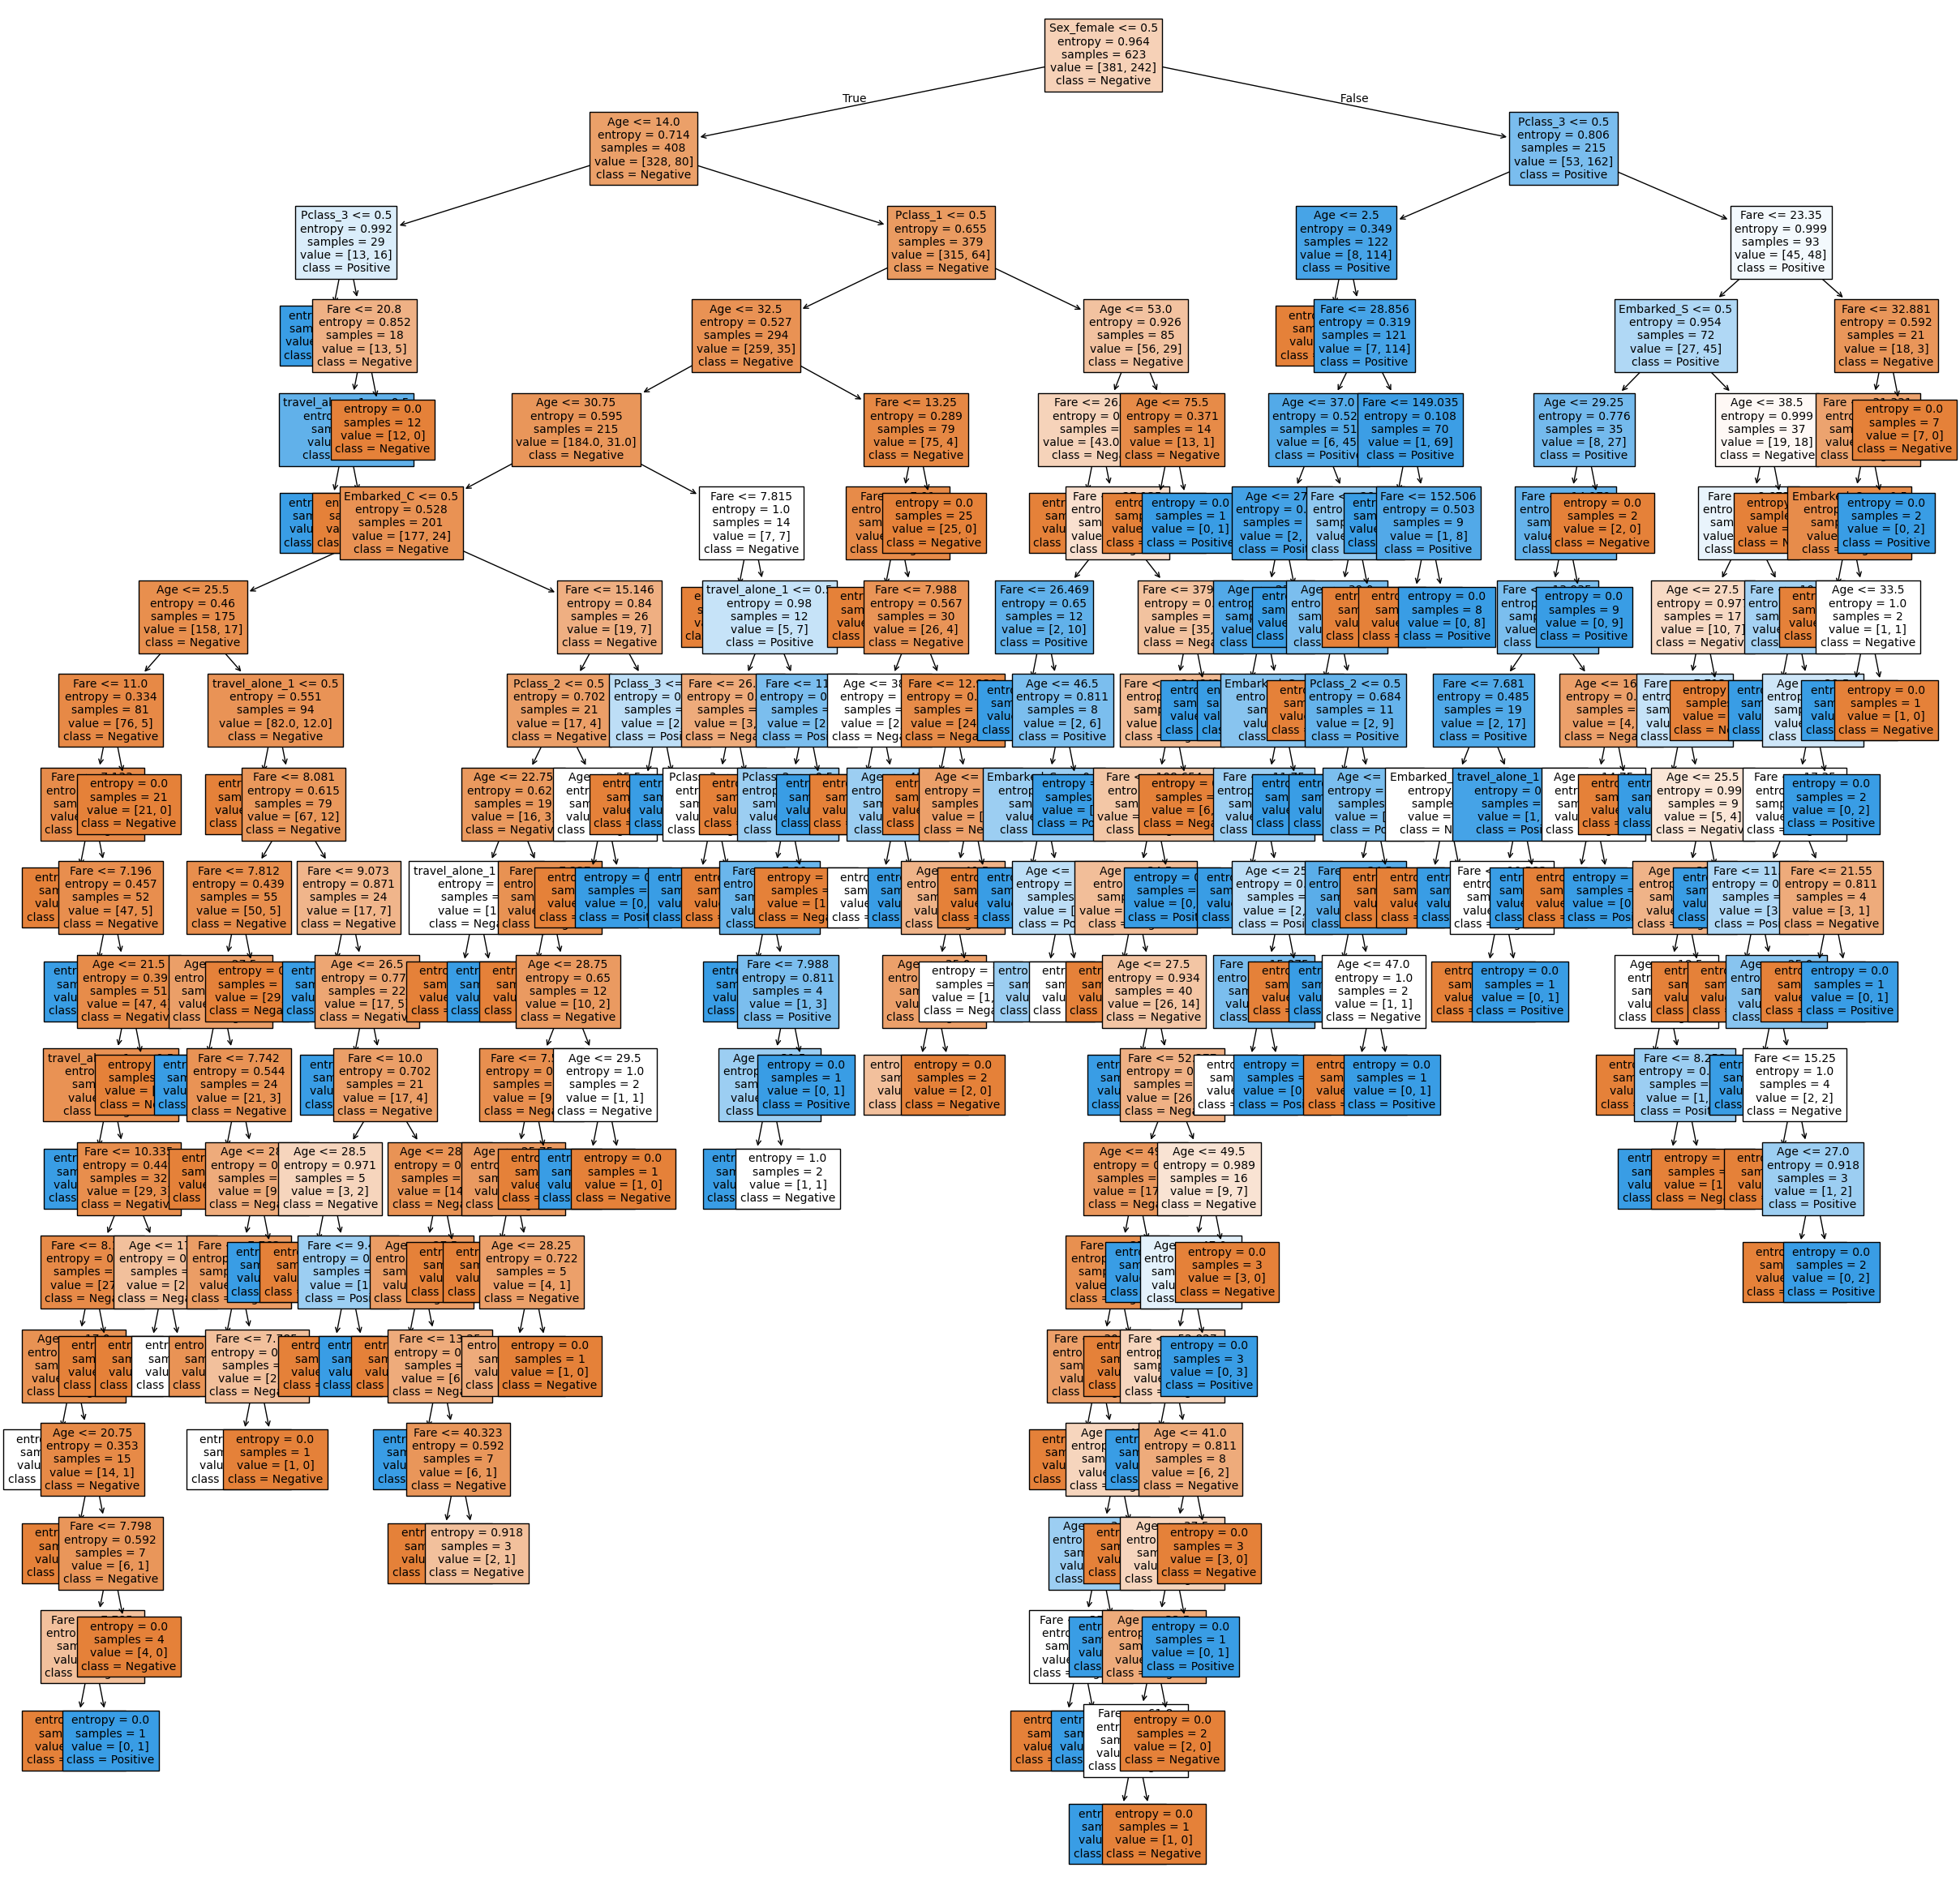

In [212]:
plt.figure(figsize=(30, 30))
tree.plot_tree(clf_tree, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True, fontsize=10)
plt.show()


In [213]:
clf_tree.score(X_train, y_train)

0.9791332263242376

In [214]:
clf_tree.score(X_test, y_test)

0.8022388059701493

In [219]:
clf_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [220]:
clf_tree.score(X_train, y_train)

0.8378812199036918

In [221]:
clf_tree.score(X_test, y_test)

0.8208955223880597

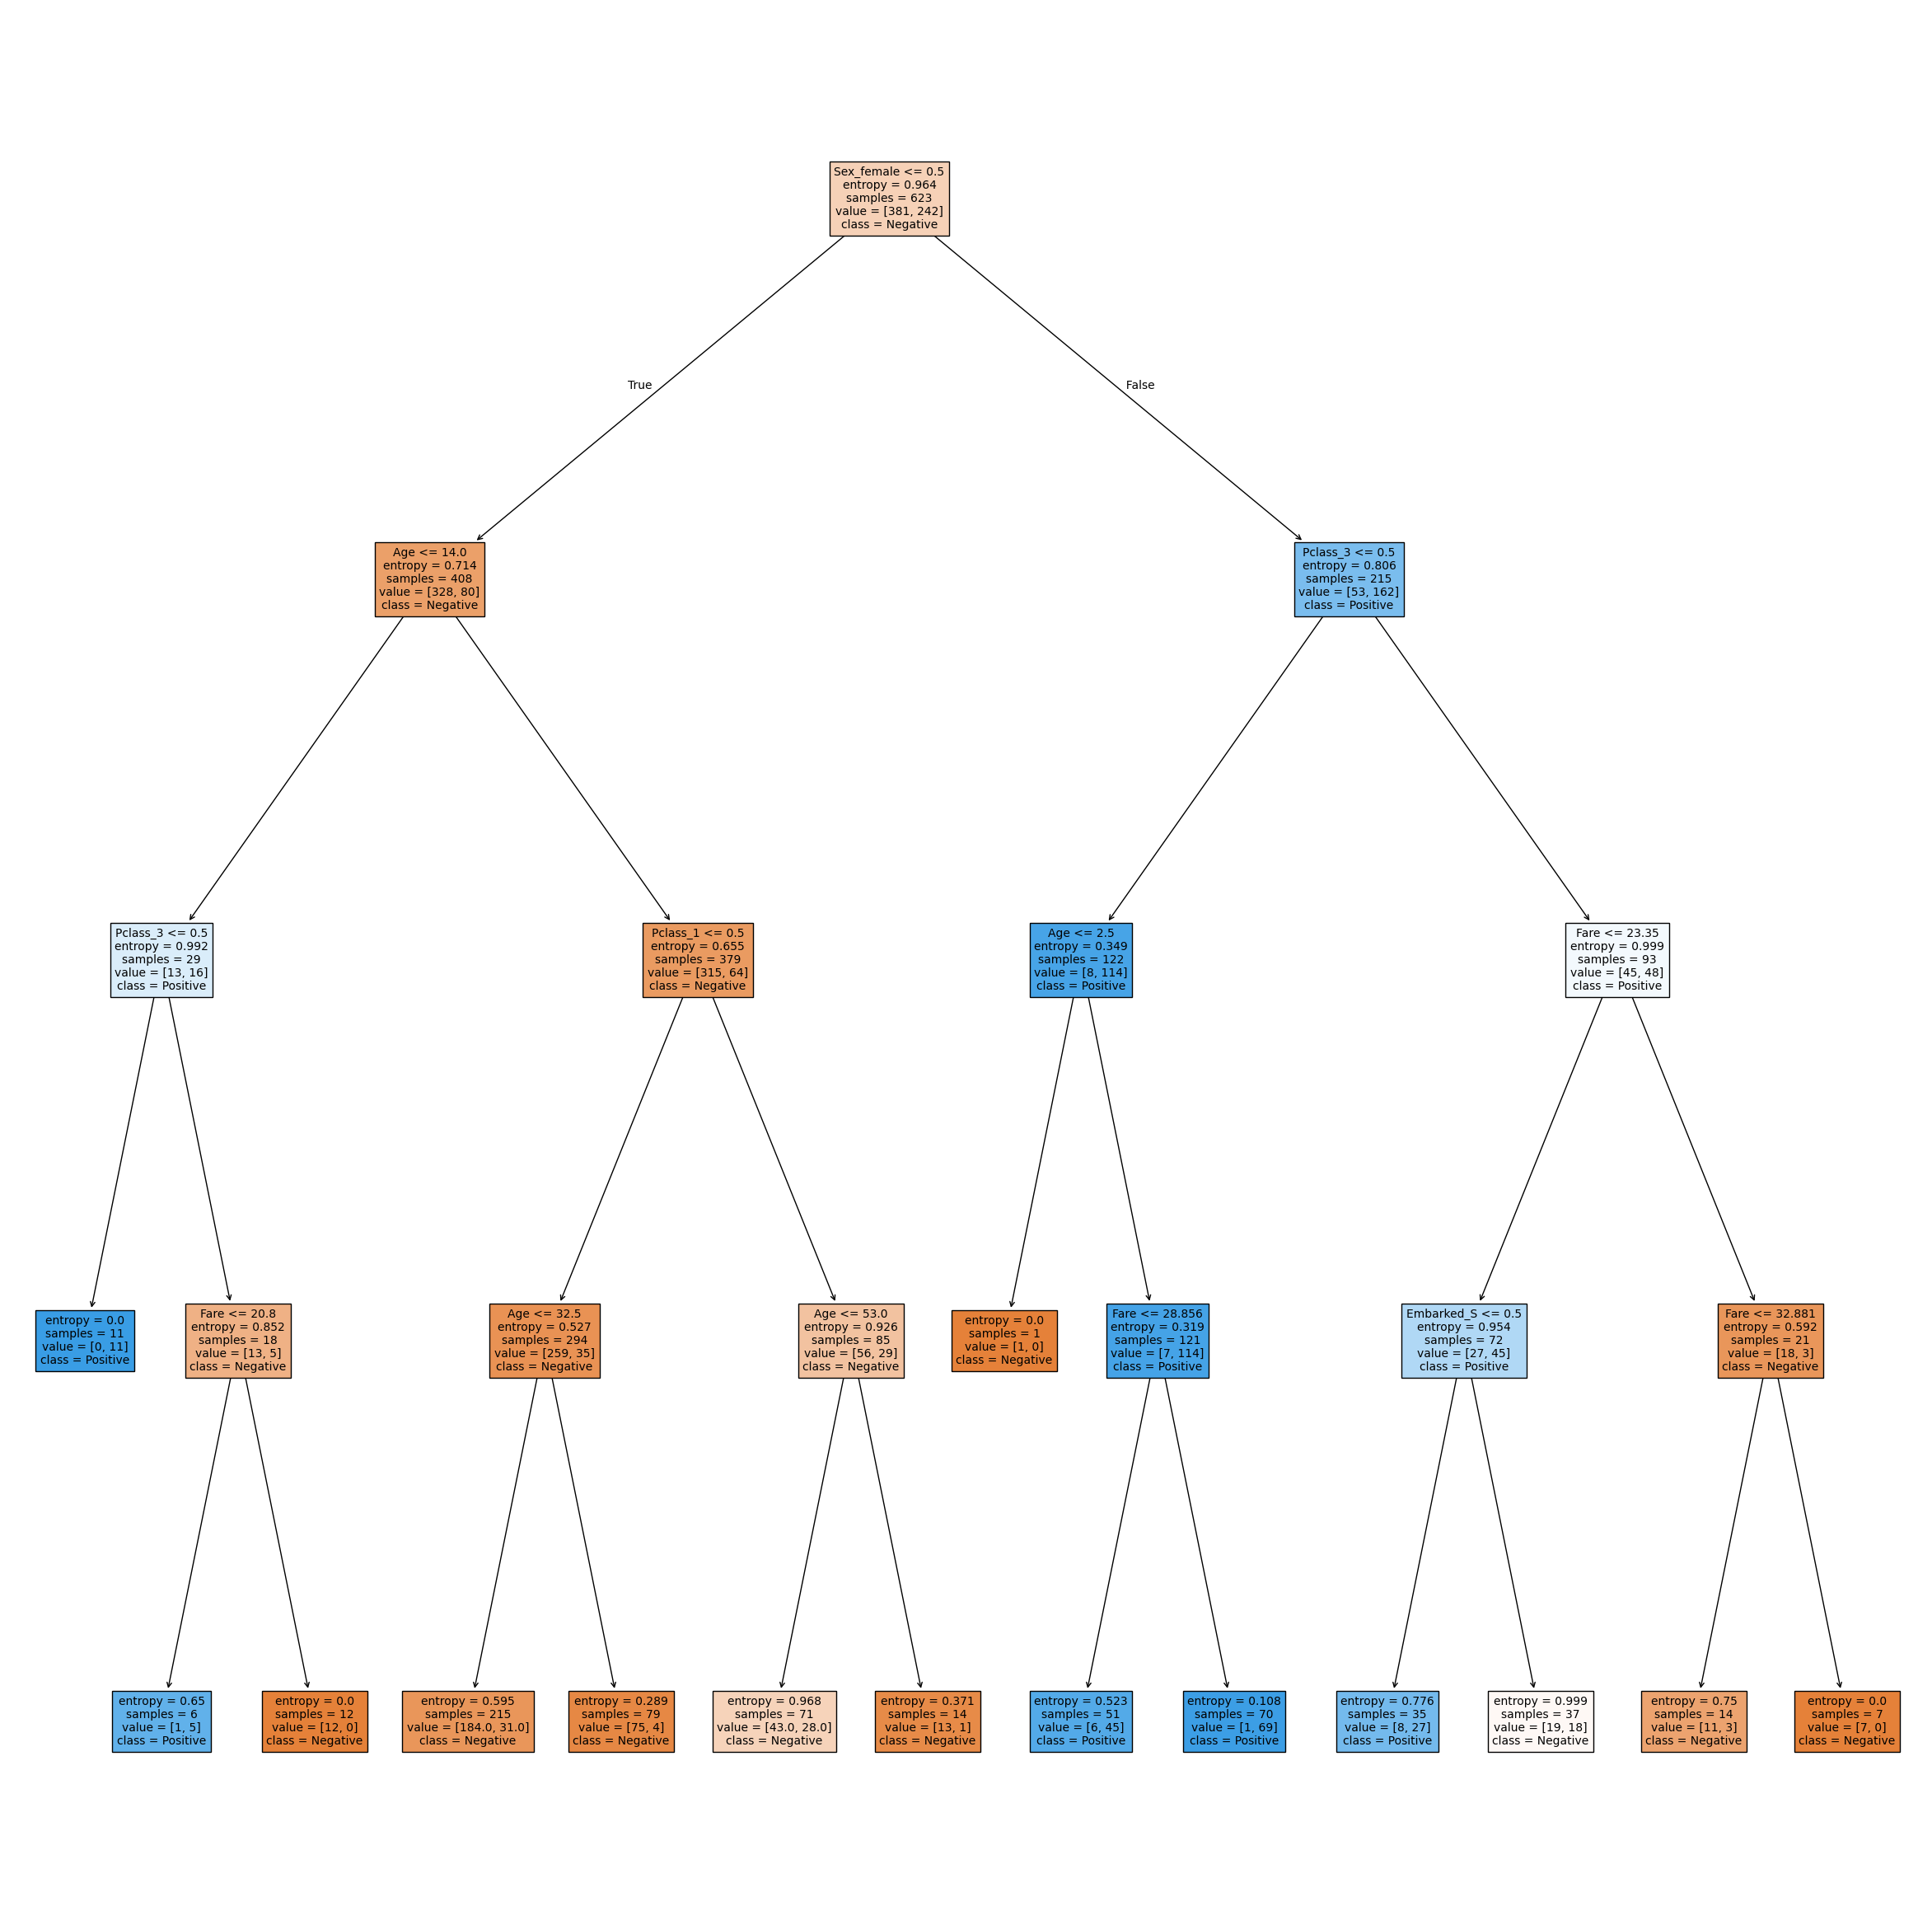

In [222]:
plt.figure(figsize=(30, 30))
tree.plot_tree(clf_tree, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True, fontsize=10)
plt.show()

In [223]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [224]:
scores_data

max_depth  train_score  test_score
0           1         0.79        0.79
0           2         0.79        0.79
0           3         0.83        0.81
0           4         0.84        0.82
0           5         0.85        0.82
..        ...          ...         ...
0          95         0.98        0.79
0          96         0.98        0.80
0          97         0.98        0.80
0          98         0.98        0.80
0          99         0.98        0.80

[99 rows x 3 columns]

In [227]:
scores_data_long

max_depth     set_type  score
0            1  train_score   0.79
1            2  train_score   0.79
2            3  train_score   0.83
3            4  train_score   0.84
4            5  train_score   0.85
..         ...          ...    ...
193         95   test_score   0.79
194         96   test_score   0.80
195         97   test_score   0.80
196         98   test_score   0.80
197         99   test_score   0.80

[198 rows x 3 columns]

<Axes: xlabel='max_depth', ylabel='score'>

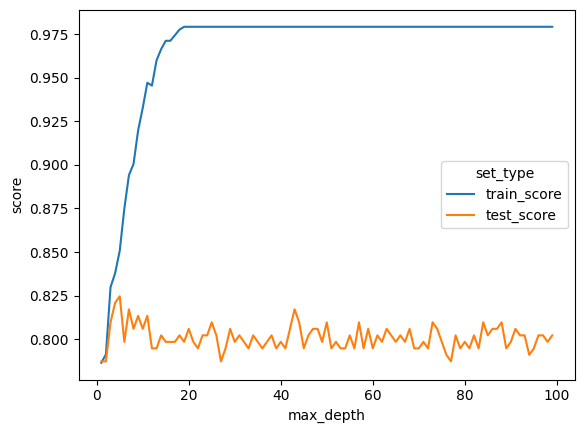

In [226]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score', 'test_score'], 
                           var_name = 'set_type', 
                           value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [229]:
clf_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [ ]:
#pip install lazypredict-nightly


In [230]:
from lazypredict import LazyClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models


100%|██████████| 31/31 [00:00<00:00, 32.81it/s]

[LightGBM] [Info] Number of positive: 175, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.616197 -> initscore=0.473438
[LightGBM] [Info] Start training from score 0.473438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.99               0.99     0.99      0.99   
Perceptron                         0.99               0.98     0.98      0.99   
LogisticRegression                 0.99               0.98     0.98      0.99   
XGBClassifier                      0.98               0.98     0.98      0.98   
SVC                                0.98               0.98     0.98      0.98   
LabelPropagation                   0.98               0.97     0.97      0.98   
LabelSpreading                     0.98               0.97     0.97      0.98   
BaggingClassifier                  0.97               0.97     0.97      0.97   
PassiveAggressiveClassifier        0.98               0.97     0.97      0.98   
SGDClassifier                      0.98               0.97     0.97      0.98   
RandomForestClassifier             0.97               0.97     0.97      0.97   
CalibratedClassifierCV             0.98               0.97     0.97      0.98   
LGBMClassifier                     0.97               0.97     0.97      0.97   
QuadraticDiscriminantAnalysis      0.96               0.97     0.97      0.97   
ExtraTreesClassifier               0.97               0.96     0.96      0.97   
RidgeClassifierCV                  0.97               0.96     0.96      0.97   
RidgeClassifier                    0.97               0.96     0.96      0.97   
AdaBoostClassifier                 0.96               0.96     0.96      0.96   
KNeighborsClassifier               0.96               0.96     0.96      0.96   
BernoulliNB                        0.95               0.95     0.95      0.95   
LinearDiscriminantAnalysis         0.96               0.95     0.95      0.96   
GaussianNB                         0.95               0.95     0.95      0.95   
NuSVC                              0.95               0.94     0.94      0.95   
ExtraTreeClassifier                0.94               0.93     0.93      0.94   
NearestCentroid                    0.95               0.93     0.93      0.95   
DecisionTreeClassifier             0.93               0.93     0.93      0.93   
DummyClassifier                    0.64               0.50     0.50      0.50   

                               Time Taken  
Model                                      
LinearSVC                            0.01  
Perceptron                           0.10  
LogisticRegression                   0.01  
XGBClassifier                        0.11  
SVC                                  0.02  
LabelPropagation                     0.01  
LabelSpreading                       0.02  
BaggingClassifier                    0.05  
PassiveAggressiveClassifier          0.01  
SGDClassifier                        0.01  
RandomForestClassifier               0.15  
CalibratedClassifierCV               0.02  
LGBMClassifier                       0.08  
QuadraticDiscriminantAnalysis        0.01  
ExtraTreesClassifier                 0.07  
RidgeClassifierCV                    0.02  
RidgeClassifier                      0.01  
AdaBoostClassifier                   0.13  
KNeighborsClassifier                 0.01  
BernoulliNB                          0.01  
LinearDiscriminantAnalysis           0.01  
GaussianNB                           0.01  
NuSVC                                0.01  
ExtraTreeClassifier                  0.01  
NearestCentroid                      0.02  
DecisionTreeClassifier               0.01  
DummyClassifier                      0.01